In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


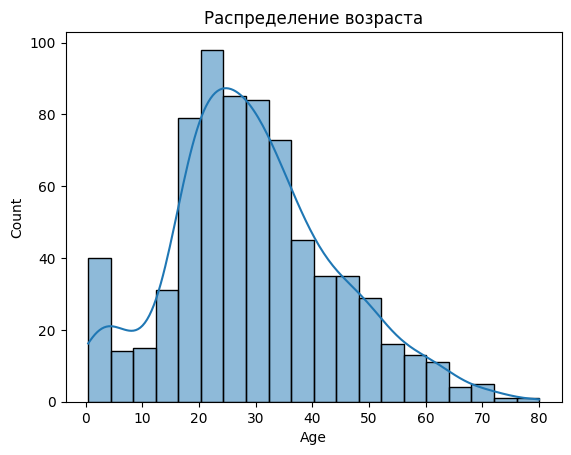

In [ ]:
# Распределение возраста
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Распределение возраста')
plt.show()

In [ ]:
age_median = train_data['Age'].median()
train_data['Age'].fillna(age_median, inplace=True)

<ipython-input-8-cd40d378f95e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(age_median, inplace=True)


In [ ]:
embarked_mode = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(embarked_mode, inplace=True)

<ipython-input-9-70105f0c618d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(embarked_mode, inplace=True)


In [ ]:
train_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


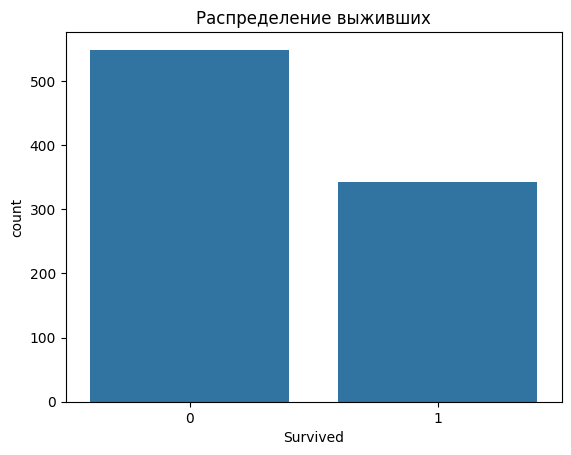

In [ ]:
sns.countplot(x='Survived', data=train_data)
plt.title('Распределение выживших')
plt.show()

In [ ]:
train_data['Survived'].value_counts(normalize=True) * 100


,proportion
Survived,
0,61.616162
1,38.383838


**Категориальные признаки:**

- Sex: Пол пассажира.
- Pclass: Класс билета.
- Embarked: Порт посадки.

**Числовые признаки:**

- Age: Возраст.
- Fare: Стоимость билета.
- SibSp: Количество братьев/сестер/супругов на борту.
- Parch: Количество родителей/детей на борту.

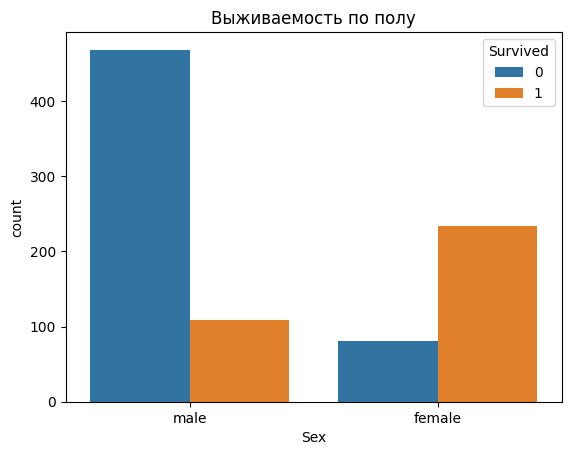

In [ ]:
# Влияние пола на выживаемость
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Выживаемость по полу')
plt.show()

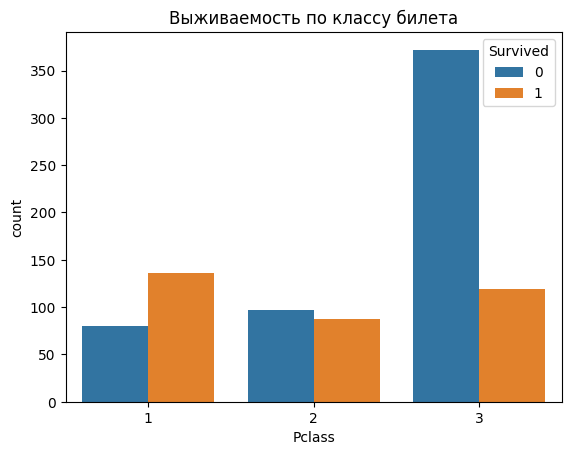

In [ ]:
# Влияние класса билета на выживаемость
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Выживаемость по классу билета')
plt.show()

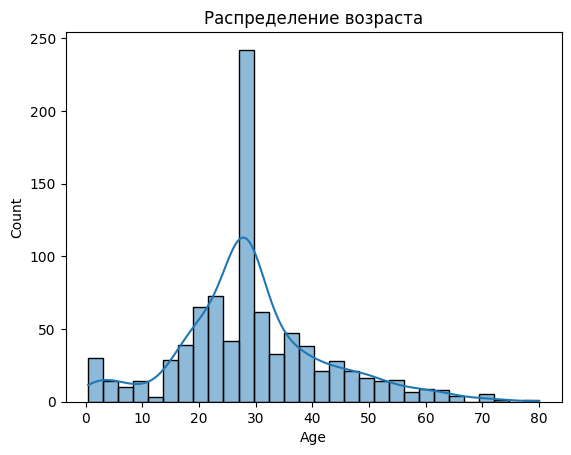

In [ ]:
# Распределение возраста
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Распределение возраста')
plt.show()

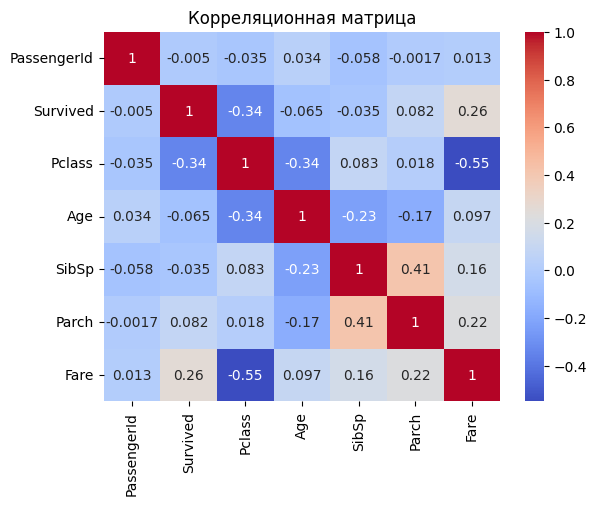

In [ ]:
# Тепловая карта корреляций
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [51]:
train_data = pd.read_csv('/content/train.csv')

features_for_imputation = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age']

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

data_for_imputation = train_data[features_for_imputation]

In [52]:
from sklearn.impute import KNNImputer

In [53]:
imputer = KNNImputer(n_neighbors=5)  # n_neighbors — количество соседей

imputed_data = imputer.fit_transform(data_for_imputation)

imputed_df = pd.DataFrame(imputed_data, columns=features_for_imputation)

train_data['Age'] = imputed_df['Age']

In [54]:
print(train_data['Age'].isnull().sum())

0


In [55]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']

train_data['IsAlone'] = (train_data['FamilySize'] == 0).astype(int)

train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

train_data['FarePerPerson'] = train_data['Fare'] / (train_data['FamilySize'] + 1)

In [56]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,AgeGroup,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,Mr,20-30,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs,30-40,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss,20-30,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,30-40,26.55000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr,30-40,8.05000


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()
train_data['Title'] = le.fit_transform(train_data['Title'])

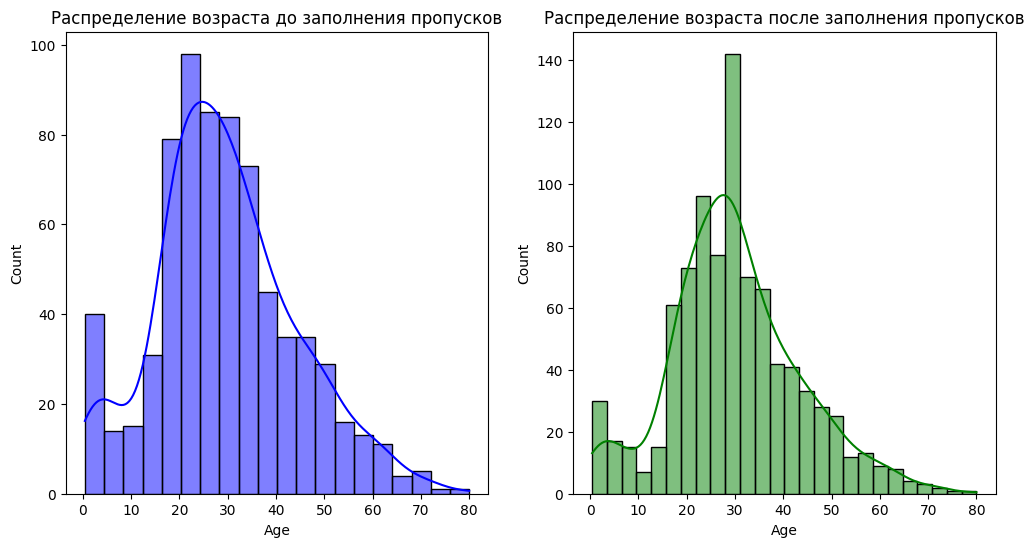

In [59]:
train_data_before = pd.read_csv('/content/train.csv')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_data_before['Age'].dropna(), kde=True, color='blue')
plt.title('Распределение возраста до заполнения пропусков')

# Распределение возраста после заполнения пропусков
plt.subplot(1, 2, 2)
sns.histplot(train_data['Age'], kde=True, color='green')
plt.title('Распределение возраста после заполнения пропусков')

plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])

In [62]:
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['AgeGroup'] = le.fit_transform(train_data['AgeGroup'])

In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    int64  
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Fare           891 non-null    float64
 8   Embarked       891 non-null    int64  
 9   FamilySize     891 non-null    int64  
 10  IsAlone        891 non-null    int64  
 11  Title          891 non-null    int64  
 12  AgeGroup       891 non-null    int64  
 13  FarePerPerson  891 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 97.6 KB


**Нормализация/стандартизация числовых признаков**

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Логистическая регрессия

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
y_pred = model.predict(X_test)

In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Случайный лес

In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8491620111731844
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       105
           1       0.82      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



Подбор гиперпараметров

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}


Оценка лучшей модели

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [79]:
y_pred = grid_search.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8435754189944135
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[93 12]
 [16 58]]
